# EDA of the dataset


Here I will do some EDA of the dataset given by Plaace and to find some intresting findings. 

Tasks:

Actions
1. Sette seg inn i datasett.
 - Flagge features som må cleanes (i.e. missing value, other data quality issues)
2. Eksplorativ analyse av data.
  - Enkle correlation plots for å identifisere interessante features.
 3. Ideer for feature engineering.
 - e.g. distance fra busstopp til butikk, cluster av nærliggende butikker, population density, etc.

Neste møte
1. Data Cleaning:
 - Impude NaN verdier.
 - Fjerne unødvendige kolonner.
 - Denormalisere datasett (i.e. slå sammen datasett.)
2. Feature Engineering:
 - Bli enige rundt interessante features i første omgang.
  - Fordele feature engineering.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#Reading the datasets 
busstops = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/busstops_norway.csv')
grunnkrets_age = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_age_distribution.csv')
grunnkrets_household = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_households_num_persons.csv')
grunnkrets_income = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_income_households.csv')
grunnkrets_norway = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/grunnkrets_norway_stripped.csv')
plaace_hierarchy = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/plaace_hierarchy.csv')
sample_submission = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/sample_submission.csv')
stores_extra = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_extra.csv')
stores_test = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_test.csv')
stores_train = pd.read_csv('C:/Users/aminp/OneDrive/Dokumenter/NTNU/4år/Machinelearning/machine_learning/data/raw/stores_train.csv')

In [5]:
grunnkrets_norway




#Merge the grunnkrets datasets into one main grunnkrets_info dataset 
grunnkrets_info_1 = grunnkrets_household.merge(grunnkrets_income, how='left', on=('grunnkrets_id', 'year'))
#grunnkrets_info_2 = grunnkrets_info_1.merge(grunnkrets_age, how='left', on=('grunnkrets_id', 'year'))
grunnkrets_info = grunnkrets_info_1.merge(grunnkrets_norway, how='left', on=('grunnkrets_id', 'year'))
# Augment stores_train with information about the hierarchy
stores_with_hierarchy = stores_train.merge(plaace_hierarchy, how='left', on='plaace_hierarchy_id')

data_all = stores_with_hierarchy.merge(grunnkrets_info, how='left', on=('grunnkrets_id', 'year'))
data_all.head()




,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,...,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,...,277500.0,669100.0,832800.0,679600.0,349500.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,...,295000.0,679600.0,802200.0,604100.0,397700.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,...,251900.0,589900.0,673100.0,637600.0,327000.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,...,293600.0,602000.0,675800.0,699600.0,335200.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,...,296500.0,635700.0,779700.0,801300.0,413600.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070


In [6]:
#Checking different information about the various datasets 


#stores_train.info()
#stores_train.describe()

#stores_test.info()
#stores_test.describe()

#grunnkrets_age.describe()
#grunnkrets_age.head()
#grunnkrets_age.info()

#grunnkrets_norway.info()
#grunnkrets_norway.describe()

#grunnkrets_household.info()
#grunnkrets_household.describe()

#grunnkrets_income.info()
#grunnkrets_income.describe()

#plaace_hierarchy.head()
#plaace_hierarchy.info()

#stores_extra.describe()  
#stores_extra.info()

#busstops.info()
#busstops.describe()

#grunnkrets_info.info()
#grunnkrets_info.describe()

#stores_with_hierarchy.info()
#stores_with_hierarchy.describe()


#stores_train.shape  
#stores_train.nunique()  

#stores_train['revenue'].unique()

#grunnkrets_income

data_all[(data_all['year'] == 2016)]
#grunnkrets_norway.info()

#busstops

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name_x,grunnkrets_id,address,lat,lon,chain_name,...,singles_y,couple_without_children_y,couple_with_children,other_households,single_parent_with_children,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,...,277500.0,669100.0,832800.0,679600.0,349500.0,Bragernes sentrum 3,Bragernes sentrum,Drammen,"POLYGON((10.2046156903846 59.7447808519649, 10...",0.155779
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,...,295000.0,679600.0,802200.0,604100.0,397700.0,Sentrum 3 /rode 6,Sentrum 3,Oslo,"POLYGON((10.7303654475615 59.9107195782207, 10...",0.264278
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,...,251900.0,589900.0,673100.0,637600.0,327000.0,Sydsiden 2,Hønefoss,Ringerike,"POLYGON((10.2654039198422 60.1639238060368, 10...",0.160152
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,...,293600.0,602000.0,675800.0,699600.0,335200.0,Sentrum 1,Sentrum,Bodø,"POLYGON((14.3800126797167 67.2852351710009, 14...",0.095029
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,...,296500.0,635700.0,779700.0,801300.0,413600.0,Tiller-Hårstad 14,Tiller-Hårstad,Trondheim,"POLYGON((10.3709720705149 63.3579302939404, 10...",0.251070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,2016,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,59.416276,10.480970,NaN,...,263600.0,563700.0,682000.0,636800.0,382100.0,Sentrum,Sentrum,Horten,"POLYGON((10.4844343691104 59.4185964815712, 10...",0.291337
12855,917921733-917982368-868081,2016,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,60.799991,10.693635,GULATING GRUPPEN,...,243200.0,457800.0,465300.0,477700.0,339200.0,Sentrum 6,Sentrum,Gjøvik,"POLYGON((10.6971768573538 60.7988198867219, 10...",0.137188
12856,911721961-911764474-496764,2016,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,59.946562,11.007659,GULATING GRUPPEN,...,286200.0,595100.0,759300.0,745200.0,359800.0,Stalsberg 3,Stalsberg,Skedsmo,"POLYGON((11.0040997448376 59.9483583629928, 11...",0.123431
12857,914337046-914343372-721294,2016,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,58.850261,5.735674,NaN,...,282700.0,597500.0,601500.0,649900.0,361700.0,Vågsgate,Sentrum,Sandnes,"POLYGON((5.7342552469665 58.8492193600012, 5.7...",0.034857


In [7]:
#Checking for null-values

#stores_train.isnull().sum()  
#stores_test.isnull().sum()
#stores_extra.isnull().sum()
#busstops.isnull().sum()
#grunnkrets_age.isnull().sum()
#grunnkrets_household.isnull().sum()
#grunnkrets_norway.isnull().sum()
#grunnkrets_income.isnull().sum()
#plaace_hierarchy.isnull().sum()
#grunnkrets_info.isnull().sum()

#stores_with_hierarchy.shape
#stores_with_hierarchy.isnull().sum()

#stores_train.revenue.isna().sum()
#stores_train.revenue

#So all stores datasets has null-values at features: adress, chain_name, mall_name
#Busstop has null-values at stoppplace_type and side_placement. 
#Rest all have values everywhere 


Text(0.5, 1.0, 'Fraction of rows with NaN values')

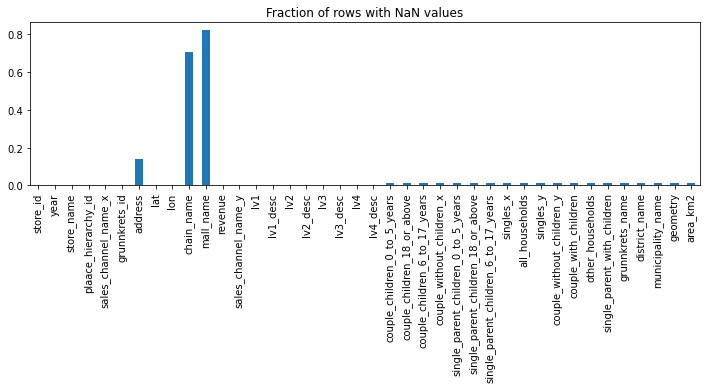

In [8]:
#Some plots: 

fig, (ax1) = plt.subplots(figsize=(12, 3), ncols=1)
data_all.isna().mean().plot.bar(ax=ax1)
ax1.set_title('Fraction of rows with NaN values')


Highest revenue:  219.599
Lowest revenue:  0.0
Avreage revenue:  8.22 



c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\aminp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

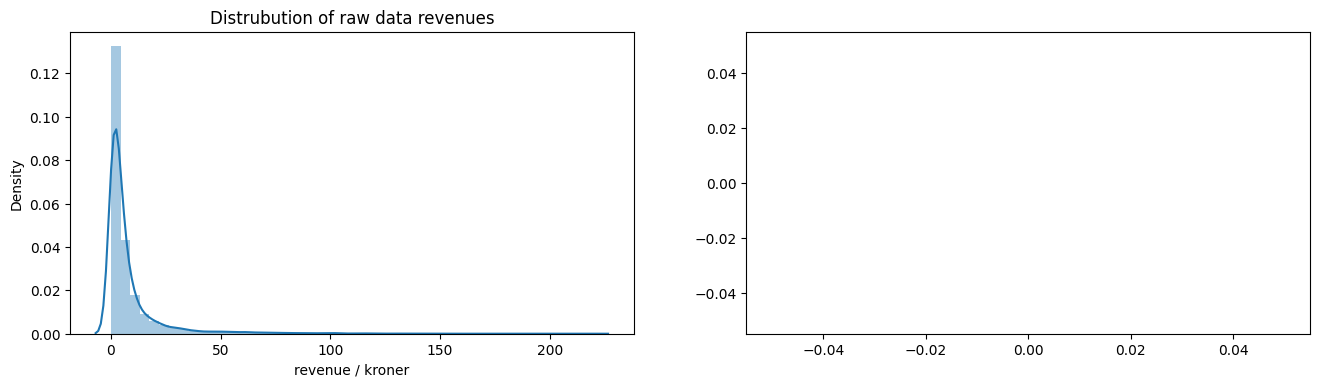

In [9]:
print("Highest revenue: ", stores_train['revenue'].max())
print('Lowest revenue: ', stores_train['revenue'].min())
print("Avreage revenue: ", round(stores_train['revenue'].mean(), 2), '\n')

fig, (ax1,ax2) = plt.subplots(figsize=(16,4), ncols=2, dpi=100)
sns.distplot(data_all.revenue.rename('revenue / kroner'), ax=ax1)
ax1.set_title("Distrubution of raw data revenues")
sns.distplot(np.log10(data_all.revenue).rename('log10(revenue)'), ax=ax2)
ax2.set_title('Distribution of train set revenue after log transform')
sns.distplot(np.log10(data_all.revenue).rename('log10(revenue)'), ax=ax2)
ax2.set_title('Distribution of train set revenue after log transform')


<AxesSubplot:>

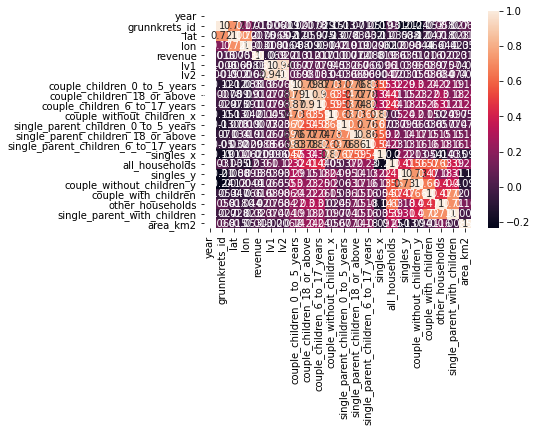

In [ ]:
#Correlation plot 

correlation = data_all.corr()

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)



In [ ]:
#sns.pairplot(data_all)

<AxesSubplot:xlabel='revenue', ylabel='all_households'>

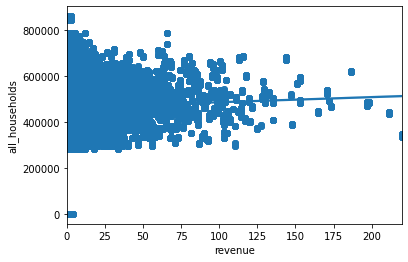

In [ ]:
sns.regplot(x="revenue", y="all_households", data = data_all)

## Now focusing on dataset by dataset
# Age


Text(0.5, 1.0, 'Count of Age')

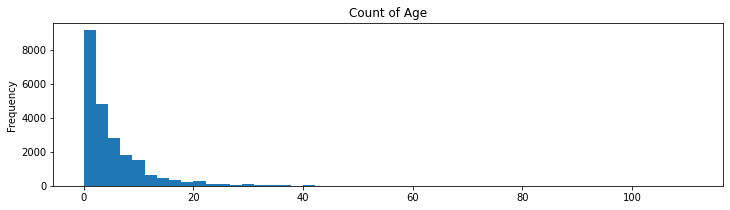

In [ ]:

fig, (ax1) = plt.subplots(figsize=(12,3))
grunnkrets_age.age_0.plot.hist(bins =50, ax=ax1)
ax1.set_title("Count of Age")



# Busstop 

In [17]:
busstops.stopplace_type.value_counts()

Plattform og lomme                22344
Kun skilt                          7024
Lomme og skilt, ikke plattform     2950
Kantstopp                          2250
Annen type                         2238
Signalstopp                        1276
Name: stopplace_type, dtype: int64

In [19]:
busstops.importance_level.value_counts()

Mangler viktighetsnivå     55514
Standard holdeplass         8935
Lokalt knutepunkt           2578
Regionalt knutepunkt         886
Annen viktig holdeplass      299
Nasjonalt knutepunkt         183
Name: importance_level, dtype: int64

# Stores With Hierarchy 

In [22]:
stores_with_hierarchy.lv1_desc.value_counts()

Retail                    6431
Services                  3273
Dining and Experiences    3155
Name: lv1_desc, dtype: int64

In [23]:
stores_with_hierarchy.lv2_desc.value_counts()

Restaurant              2452
Beauty and wellbeing    2137
Food and drinks         1514
Clothing stores         1143
Home and decor          1001
Other Retail             781
Professionals            666
Sports and leisure       636
House and building       553
Bakery and cafe          451
Cars and boats           364
Electronics stores       344
Gyms                     318
Pubs and bars            239
Other Services           151
Jewelry and perfume       95
Shops                     13
Agencies                   1
Name: lv2_desc, dtype: int64

In [24]:
stores_with_hierarchy.lv3_desc.value_counts()

Other dining              1373
Spas                      1212
Grocery stores            1080
Clothing stores            877
Hairdressers               795
                          ... 
Tobacco shop                 1
Carpet stores                1
Audio and video stores       1
Advertising agencies         1
Car accessories stores       1
Name: lv3_desc, Length: 85, dtype: int64

In [25]:
stores_with_hierarchy.lv4_desc.value_counts()

Spas                      1212
Grocery stores            1080
Clothing stores            877
Hairdressers               795
Restaurants                600
                          ... 
Audio and video stores       1
Advertising agencies         1
Car accessories stores       1
Tobacco shops                1
Carpet stores                1
Name: lv4_desc, Length: 91, dtype: int64

In [35]:
plaace_hierarchy[plaace_hierarchy['sales_channel_name'].str.strip() != plaace_hierarchy['lv4_desc'].str.strip()]

,plaace_hierarchy_id,sales_channel_name,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
23,2.1.1.0,Hardware store,2,Retail,2.1,House and building,2.1.1,Hardware stores,2.1.1.0,Hardware stores
39,2.3.6.0,Audio and video store,2,Retail,2.3,Electronics stores,2.3.6,Audio and video stores,2.3.6.0,Audio and video stores
60,2.7.3.0,Travel accessories stores,2,Retail,2.7,Other Retail,2.7.3,Travel accessories stores,2.7.3.0,travel accessories stores
71,2.8.8.0,Tobacco shop,2,Retail,2.8,Food and drinks,2.8.8,Tobacco shop,2.8.8.0,Tobacco shops


# Issue 1: Population Feature 

Definition
Population number of a given geography

Datasets: Age

Todos: 
- Feature name: Population_in_GK
- For each grunnkrets_ID we must sum the amount of the row from age0 to age90 to calculate the total number of people in that grunnkrets
- NB! Check for duplicate rows

In [38]:
grunnkrets_age


,grunnkrets_id,year,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,16013117,2015,14,14,14,14,13,13,12,11,...,0,0,0,0,0,0,0,0,0,0
1,16013117,2016,10,10,10,10,10,10,9,9,...,0,0,0,0,0,0,0,0,0,0
2,11030206,2015,5,5,5,5,5,4,4,3,...,0,0,0,0,0,0,0,0,0,0
3,16011203,2016,2,2,2,2,2,3,3,3,...,1,1,1,1,1,1,1,0,0,0
4,3011601,2016,7,7,7,7,6,6,5,4,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22615,9400104,2016,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22616,9400106,2015,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
22617,9400108,2015,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
22618,9400108,2016,0,1,1,0,0,0,1,1,...,1,1,1,1,1,1,0,0,0,0


In [41]:
#Need to partion into only years = 2016 

#data_all[(data_all['year'] == 2016)]

grunnkrets_age.count()



0        False
1        False
2        False
3        False
4        False
         ...  
22615    False
22616    False
22617    False
22618    False
22619    False
Length: 22620, dtype: bool